In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PLOT_COLORS = ['#268BD2', "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style = 'ticks')
plt.rc('figure', figsize = (8,5), dpi = 100)
plt.rc('axes', labelpad = 20, facecolor = "#ffffff", linewidth = 0.4, grid = True, labelsize = 14)
plt.rc('patch', linewidth = 0)
plt.rc('xtick.major', width = 0.2)
plt.rc('ytick.major', width = 0.2)
plt.rc('grid', color ='#9E9E9E', linewidth = 0.4)
plt.rc('font', family = 'Arial', weight = '400', size = 10)
plt.rc('text', color = '#282828')
plt.rc('savefig', pad_inches = 0.3, dpi = 300)

##### we load the dataframe

In [3]:
path = 'C:\\Users\ABOLARIN BUKOLA\Documents\Data set\PatientInfo.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.head(10)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.00,male,1964.00,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.00,nan,75.00,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.00,male,1987.00,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.00,nan,31.00,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.00,male,1964.00,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.00,2002000001.00,17.00,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.00,male,1991.00,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.00,nan,9.00,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.00,female,1992.00,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.00,1000000002.00,2.00,NaN,2020-01-31,2020-02-24,NaN,released
5,1000000006,10.00,female,1966.00,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.00,1000000003.00,43.00,NaN,2020-01-31,2020-02-19,NaN,released
6,1000000007,11.00,male,1995.00,20s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.00,1000000003.00,0.00,NaN,2020-01-31,2020-02-10,NaN,released
7,1000000008,13.00,male,1992.00,20s,Korea,Seoul,etc,NaN,overseas inflow,1.00,nan,0.00,NaN,2020-02-02,2020-02-24,NaN,released
8,1000000009,19.00,male,1983.00,30s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,2.00,nan,68.00,NaN,2020-02-05,2020-02-21,NaN,released
9,1000000010,21.00,female,1960.00,60s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,3.00,1000000003.00,6.00,NaN,2020-02-05,2020-02-29,NaN,released


##### Dropping patient_id column because it will probably be useless during the EDA

In [6]:
df.drop(['patient_id','global_num', 'city', 'birth_year'], axis = 1, inplace = True)

In [7]:
df.head(20)

,sex,age,country,province,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,male,50s,Korea,Seoul,NaN,overseas inflow,1.00,nan,75.00,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,male,30s,Korea,Seoul,NaN,overseas inflow,1.00,nan,31.00,NaN,2020-01-30,2020-03-02,NaN,released
2,male,50s,Korea,Seoul,NaN,contact with patient,2.00,2002000001.00,17.00,NaN,2020-01-30,2020-02-19,NaN,released
3,male,20s,Korea,Seoul,NaN,overseas inflow,1.00,nan,9.00,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,female,20s,Korea,Seoul,NaN,contact with patient,2.00,1000000002.00,2.00,NaN,2020-01-31,2020-02-24,NaN,released
5,female,50s,Korea,Seoul,NaN,contact with patient,3.00,1000000003.00,43.00,NaN,2020-01-31,2020-02-19,NaN,released
6,male,20s,Korea,Seoul,NaN,contact with patient,3.00,1000000003.00,0.00,NaN,2020-01-31,2020-02-10,NaN,released
7,male,20s,Korea,Seoul,NaN,overseas inflow,1.00,nan,0.00,NaN,2020-02-02,2020-02-24,NaN,released
8,male,30s,Korea,Seoul,NaN,overseas inflow,2.00,nan,68.00,NaN,2020-02-05,2020-02-21,NaN,released
9,female,60s,Korea,Seoul,NaN,contact with patient,3.00,1000000003.00,6.00,NaN,2020-02-05,2020-02-29,NaN,released


In [8]:
df.isnull().sum()

sex                     94
age                    105
country                 90
province                 0
disease               3110
infection_case         819
infection_order       3097
infected_by           2393
contact_number        2539
symptom_onset_date    2682
confirmed_date           0
released_date         2147
deceased_date         3072
state                    0
dtype: int64

In [9]:
df['state'].unique()

array(['released', 'isolated', 'deceased'], dtype=object)

In [10]:
df[df['state'].apply(lambda x : x == 'deceased')]

,sex,age,country,province,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
641,male,70s,Korea,Busan,NaN,etc,nan,nan,1.00,2020-02-28,2020-02-28,NaN,NaN,deceased
665,female,80s,Korea,Busan,NaN,NaN,nan,nan,24.00,2020-02-15,2020-03-13,NaN,NaN,deceased
667,male,70s,Korea,Busan,NaN,etc,nan,nan,11.00,2020-03-09,2020-03-13,NaN,NaN,deceased
698,female,50s,Korea,Daegu,True,NaN,nan,nan,nan,NaN,2020-02-18,NaN,2020-02-23,deceased
737,male,70s,Korea,Daegu,NaN,Shincheonji Church,nan,nan,nan,NaN,2020-02-21,NaN,2020-02-26,deceased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,male,60s,Korea,Gyeongsangbuk-do,True,Cheongdo Daenam Hospital,nan,nan,nan,NaN,2020-02-20,NaN,2020-02-19,deceased
2903,male,60s,Korea,Gyeongsangbuk-do,True,Cheongdo Daenam Hospital,nan,nan,nan,NaN,2020-02-21,NaN,2020-02-24,deceased
2904,female,50s,Korea,Gyeongsangbuk-do,True,Cheongdo Daenam Hospital,nan,nan,nan,NaN,2020-02-22,NaN,2020-02-21,deceased
2905,male,60s,Korea,Gyeongsangbuk-do,True,Cheongdo Daenam Hospital,nan,nan,nan,NaN,2020-02-22,NaN,2020-02-23,deceased


In [11]:
df[df['deceased_date'].apply(lambda x : x == np.nan)]

,sex,age,country,province,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state


In [12]:
df1 = df.loc[(df['state'] == 'deceased') & (df['deceased_date'].isnull())]

In [13]:
df1

,sex,age,country,province,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
641,male,70s,Korea,Busan,NaN,etc,nan,nan,1.00,2020-02-28,2020-02-28,NaN,NaN,deceased
665,female,80s,Korea,Busan,NaN,NaN,nan,nan,24.00,2020-02-15,2020-03-13,NaN,NaN,deceased
667,male,70s,Korea,Busan,NaN,etc,nan,nan,11.00,2020-03-09,2020-03-13,NaN,NaN,deceased
916,male,60s,Korea,Ulsan,NaN,etc,nan,nan,nan,2020-02-27,2020-02-28,NaN,NaN,deceased
2456,male,40s,Korea,Gyeongsangbuk-do,NaN,etc,nan,nan,nan,NaN,2020-02-22,NaN,NaN,deceased


In [14]:
df.drop([641,665,667,916,2456], inplace = True)

In [15]:
df1 = df.loc[(df['state'] == 'deceased') & (df['deceased_date'].isnull())]
df1

,sex,age,country,province,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state


In [16]:
df2 = df.loc[(df['state'] == 'released') & (df['released_date'].isnull())]
df2

,sex,age,country,province,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
12,male,80s,Korea,Seoul,NaN,contact with patient,4.00,1000000017.00,117.00,NaN,2020-02-16,NaN,NaN,released
29,male,60s,China,Seoul,NaN,Eunpyeong St. Mary's Hospital,nan,nan,nan,NaN,2020-02-23,NaN,NaN,released
38,female,70s,China,Seoul,NaN,overseas inflow,nan,nan,nan,NaN,2020-02-25,NaN,NaN,released
39,female,60s,Korea,Seoul,NaN,overseas inflow,nan,1500000002.00,nan,NaN,2020-02-25,NaN,NaN,released
42,female,20s,Korea,Seoul,NaN,overseas inflow,nan,nan,nan,NaN,2020-02-26,NaN,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,female,10s,Korea,Gyeongsangnam-do,NaN,Changnyeong Coin Karaoke,nan,nan,nan,NaN,2020-03-04,NaN,NaN,released
3080,female,60s,Korea,Gyeongsangnam-do,NaN,etc,nan,nan,nan,NaN,2020-03-04,NaN,NaN,released
3084,male,20s,Korea,Gyeongsangnam-do,NaN,Changnyeong Coin Karaoke,nan,nan,nan,NaN,2020-03-05,NaN,NaN,released
3087,male,20s,Korea,Gyeongsangnam-do,NaN,contact with patient,nan,6100000076.00,nan,NaN,2020-03-06,NaN,NaN,released


In [17]:
df.drop(df2.index, inplace = True)

In [18]:
df2 = df.loc[(df['state'] == 'released') & (df['released_date'].isnull())]
df2

,sex,age,country,province,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2969 entries, 0 to 3127
Data columns (total 14 columns):
sex                   2877 non-null object
age                   2867 non-null object
country               2880 non-null object
province              2969 non-null object
disease               18 non-null object
infection_case        2167 non-null object
infection_order       30 non-null float64
infected_by           698 non-null float64
contact_number        499 non-null float64
symptom_onset_date    400 non-null object
confirmed_date        2969 non-null object
released_date         981 non-null object
deceased_date         56 non-null object
state                 2969 non-null object
dtypes: float64(3), object(11)
memory usage: 347.9+ KB


In [20]:
df.isnull().sum()

sex                     92
age                    102
country                 89
province                 0
disease               2951
infection_case         802
infection_order       2939
infected_by           2271
contact_number        2470
symptom_onset_date    2569
confirmed_date           0
released_date         1988
deceased_date         2913
state                    0
dtype: int64

In [21]:
df['released_date'].replace(np.nan, 'None', inplace = True)

In [22]:
df['deceased_date'].replace(np.nan, 'None', inplace = True)

In [23]:
df.head(20)

,sex,age,country,province,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,male,50s,Korea,Seoul,NaN,overseas inflow,1.00,nan,75.00,2020-01-22,2020-01-23,2020-02-05,None,released
1,male,30s,Korea,Seoul,NaN,overseas inflow,1.00,nan,31.00,NaN,2020-01-30,2020-03-02,None,released
2,male,50s,Korea,Seoul,NaN,contact with patient,2.00,2002000001.00,17.00,NaN,2020-01-30,2020-02-19,None,released
3,male,20s,Korea,Seoul,NaN,overseas inflow,1.00,nan,9.00,2020-01-26,2020-01-30,2020-02-15,None,released
4,female,20s,Korea,Seoul,NaN,contact with patient,2.00,1000000002.00,2.00,NaN,2020-01-31,2020-02-24,None,released
5,female,50s,Korea,Seoul,NaN,contact with patient,3.00,1000000003.00,43.00,NaN,2020-01-31,2020-02-19,None,released
6,male,20s,Korea,Seoul,NaN,contact with patient,3.00,1000000003.00,0.00,NaN,2020-01-31,2020-02-10,None,released
7,male,20s,Korea,Seoul,NaN,overseas inflow,1.00,nan,0.00,NaN,2020-02-02,2020-02-24,None,released
8,male,30s,Korea,Seoul,NaN,overseas inflow,2.00,nan,68.00,NaN,2020-02-05,2020-02-21,None,released
9,female,60s,Korea,Seoul,NaN,contact with patient,3.00,1000000003.00,6.00,NaN,2020-02-05,2020-02-29,None,released


In [24]:
df['sex'].unique()

array(['male', 'female', nan], dtype=object)

In [25]:
df['disease'].unique()

array([nan, True], dtype=object)

##### From the dataset description disease is set to contain either TRUE or FALSE but looks nan is replacing False
##### let's correct that

In [26]:
df['disease'].replace(np.nan, False, inplace = True)

In [27]:
df['infection_case'].unique()

array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', 'Onchun Church', nan,
       'Ministry of Oceans and Fisheries', 'gym facility in Cheonan',
       'gym facility in Sejong', 'River of Grace Community Church',
       'Gyeongsan Seorin Nursing Home',
       'Gyeongsan Cham Joeun Community Center',
       'Gyeongsan Jeil Silver Town', 'Bonghwa Pureun Nursing Home',
       'Pilgrimage to Israel', 'Cheongdo Daenam Hospital',
       'Milal Shelter', 'Geochang Church'], dtype=object)

In [28]:
df['infection_case'].replace('etc', 'others', inplace = True)

In [29]:
df.isnull().sum()

sex                     92
age                    102
country                 89
province                 0
disease                  0
infection_case         802
infection_order       2939
infected_by           2271
contact_number        2470
symptom_onset_date    2569
confirmed_date           0
released_date            0
deceased_date            0
state                    0
dtype: int64

##### we are going to drop columns that are having to many missing values

In [30]:
df.drop(['infection_order','infected_by','contact_number','symptom_onset_date'], axis = 1, inplace = True)

In [31]:
df.isnull().sum()

sex                92
age               102
country            89
province            0
disease             0
infection_case    802
confirmed_date      0
released_date       0
deceased_date       0
state               0
dtype: int64

In [34]:
df['age'].unique()

array(['50s', '30s', '20s', '60s', '70s', '80s', '40s', '10s', '90s',
       '0s', nan, '100s', '66s'], dtype=object)

In [35]:
df['country'].unique()

array(['Korea', 'China', 'United States', 'France', 'Thailand', 'Canada',
       nan, 'Switzerland', 'Indonesia', 'Mongolia', 'Spain'], dtype=object)

In [36]:
df.dropna(inplace = True)

In [37]:
df.isnull().sum()

sex               0
age               0
country           0
province          0
disease           0
infection_case    0
confirmed_date    0
released_date     0
deceased_date     0
state             0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 3127
Data columns (total 10 columns):
sex               2067 non-null object
age               2067 non-null object
country           2067 non-null object
province          2067 non-null object
disease           2067 non-null bool
infection_case    2067 non-null object
confirmed_date    2067 non-null object
released_date     2067 non-null object
deceased_date     2067 non-null object
state             2067 non-null object
dtypes: bool(1), object(9)
memory usage: 163.5+ KB


##### After checking if the data types for each column is suitable for it we realised that we need to convert age column to float or int

In [39]:
age_int = []
for i in df['age']:
    s_removed = i[:-1]
    age_int.append(s_removed)
df['age_int'] = age_int    

##### let's now drop the age column since we won't be needing it and convert the new_age column to int data type

In [40]:
df.drop('age', axis = 1, inplace = True)

In [41]:
df['age_int'] = df['age_int'].astype('int')

In [42]:
df.reset_index(drop = True, inplace = True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 10 columns):
sex               2067 non-null object
country           2067 non-null object
province          2067 non-null object
disease           2067 non-null bool
infection_case    2067 non-null object
confirmed_date    2067 non-null object
released_date     2067 non-null object
deceased_date     2067 non-null object
state             2067 non-null object
age_int           2067 non-null int32
dtypes: bool(1), int32(1), object(8)
memory usage: 139.4+ KB


In [44]:
df.describe(include = 'all')

,sex,country,province,disease,infection_case,confirmed_date,released_date,deceased_date,state,age_int
count,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067.00
unique,2,10,17,2,21,65,54,16,3,nan
top,female,Korea,Gyeonggi-do,False,contact with patient,2020-03-10,None,None,isolated,nan
freq,1131,2050,595,2059,798,86,1542,2047,1523,nan
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.56
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.52
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00


### Questions we which to answer
##### -- percentage of  male and female infected
##### -- province that are most infected by the virus
##### -- Country of the patients
##### -- Rate of people having an underlying disease
##### -- How the patient was infected
##### --  Rate of isolated,released,deceased
##### -- avg number of days from confirm to released
##### -- avg  number of days from confirm to deaceased
##### --  Age of the patients
##### -- Rate of increase

## Q1

In [45]:
sex_count = df['sex'].value_counts().to_dict()
sex_count

{'female': 1131, 'male': 936}

Text(0.5, 1.0, 'SEX VALUE COUNT')

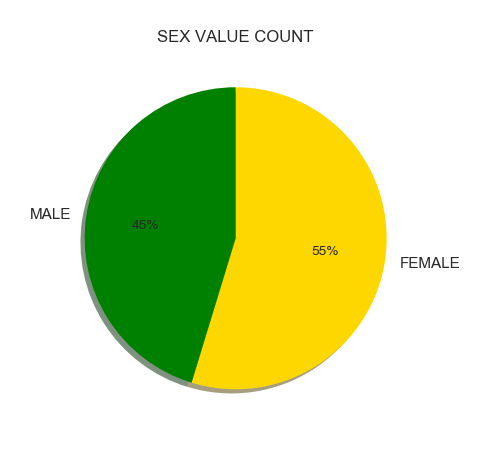

In [46]:
fig,ax = plt.subplots()
plt.pie([sex_count['female'], sex_count['male']], labels = ['FEMALE', 'MALE'], counterclock=False, autopct = '%0.f%%',
      shadow = True, startangle = 90, colors = ['gold', 'green'])
ax.set_title('SEX VALUE COUNT')

In [47]:
df['sex'].value_counts(normalize = True) * 100

female   54.72
male     45.28
Name: sex, dtype: float64

##### Percentage of female patients is approximately 56% while that of male patients is approximately 44%

## Q2

In [48]:
province_count = df['province'].value_counts().to_frame().reset_index().rename(columns = {'index': 'province', 'province': 'Value_count'})

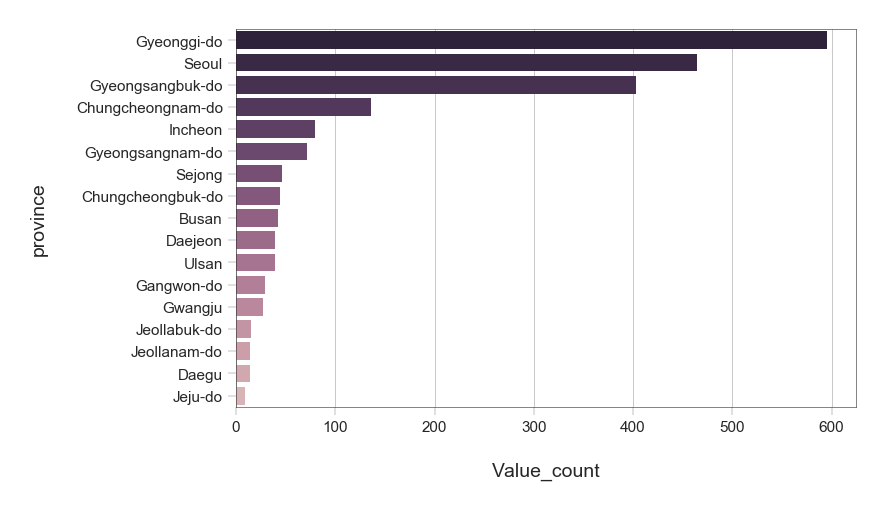

In [49]:
fig, ax = plt.subplots()
sns.barplot(x = 'Value_count', y = 'province', data = province_count, palette = sns.cubehelix_palette(n_colors = 20, reverse = True), ax = ax)

## Q3

In [50]:
country_count = df['country'].value_counts().to_frame().reset_index().rename(columns = {'index': 'country', 'country': 'Value_count'})

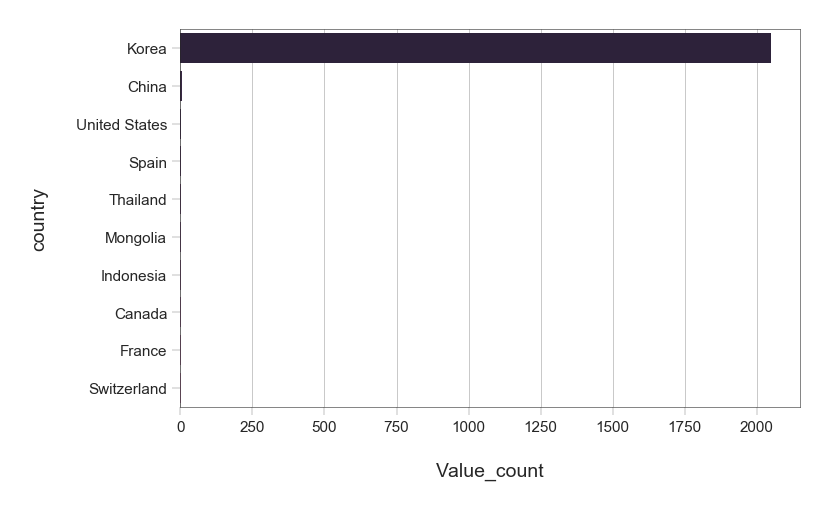

In [51]:
fig, ax = plt.subplots()
sns.barplot(x = 'Value_count', y = 'country', data = country_count, palette = sns.cubehelix_palette(n_colors = 20, reverse = True), ax = ax)

##### Majority of the patients are from korean. No suprise there

## Q4

In [52]:
disease_count = df['disease'].value_counts().to_frame().reset_index().rename(columns = {'index': 'disease', 'disease': 'Value_count'})

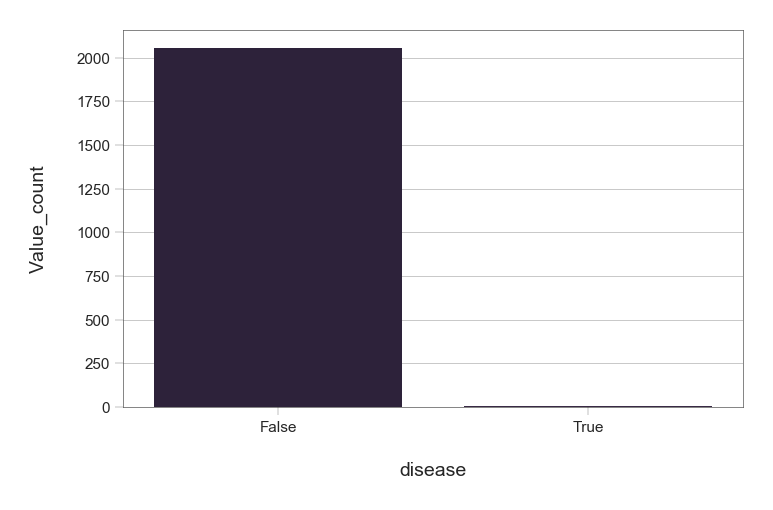

In [53]:
 fig, ax = plt.subplots()
sns.barplot( x = 'disease', y = 'Value_count', data = disease_count, palette = sns.cubehelix_palette(n_colors = 20, reverse = True), ax = ax)

##### Majority of the patients have NO underlying disease

## Q5

In [54]:
infection_count = df['infection_case'].value_counts().to_frame().reset_index().rename(columns = {'index': 'infection case', 'infection_case': 'Value_count'})

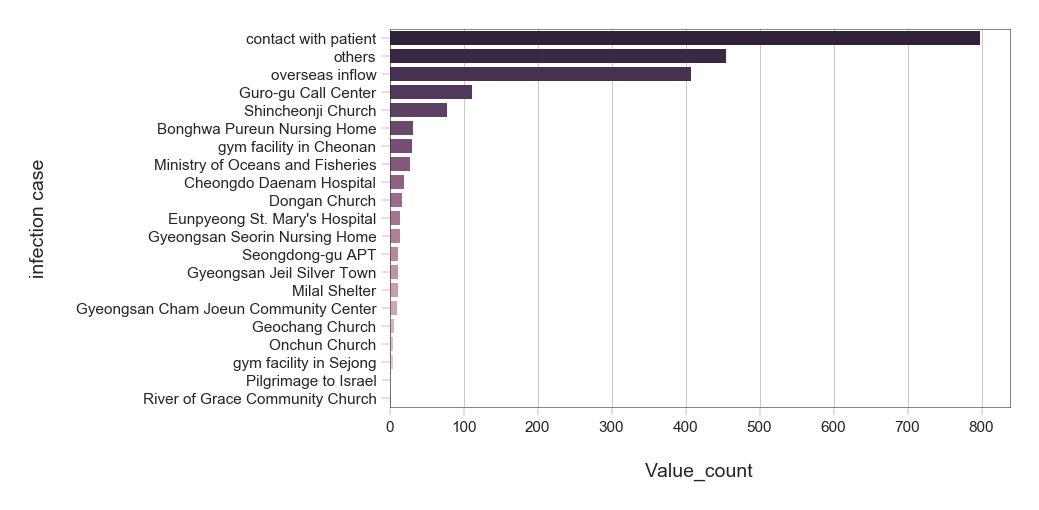

In [55]:
fig, ax = plt.subplots()
sns.barplot( x = 'Value_count', y = 'infection case', data = infection_count, palette = sns.cubehelix_palette(n_colors = 20, reverse = True), ax = ax)

In [56]:
infection_rate = df['infection_case'].value_counts(normalize = True)
infection_rate

contact with patient                    0.39
others                                  0.22
overseas inflow                         0.20
Guro-gu Call Center                     0.05
Shincheonji Church                      0.04
Bonghwa Pureun Nursing Home             0.01
gym facility in Cheonan                 0.01
Ministry of Oceans and Fisheries        0.01
Cheongdo Daenam Hospital                0.01
Dongan Church                           0.01
Eunpyeong St. Mary's Hospital           0.01
Gyeongsan Seorin Nursing Home           0.01
Seongdong-gu APT                        0.01
Gyeongsan Jeil Silver Town              0.01
Milal Shelter                           0.01
Gyeongsan Cham Joeun Community Center   0.00
Geochang Church                         0.00
Onchun Church                           0.00
gym facility in Sejong                  0.00
Pilgrimage to Israel                    0.00
River of Grace Community Church         0.00
Name: infection_case, dtype: float64

#####  Of all the infection_case,  42% was cause by contact with patient 

## Q6

In [57]:
state_count = df['state'].value_counts().to_dict()
state_count

{'isolated': 1523, 'released': 524, 'deceased': 20}

Text(0.5, 1.0, 'STATE VALUE COUNT')

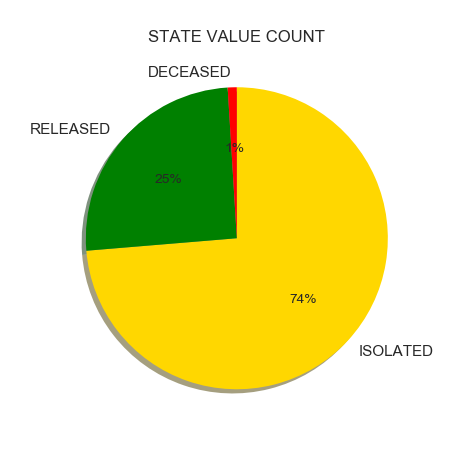

In [58]:
fig,ax = plt.subplots()
plt.pie([state_count['isolated'], state_count['released'], state_count['deceased']], labels = ['ISOLATED', 'RELEASED', 'DECEASED'], counterclock=False, autopct = '%0.f%%',
      shadow = True, startangle = 90, colors = ['gold', 'green', 'red'])
ax.set_title('STATE VALUE COUNT')

##### 78% of the patients are in isolation state,22% have been released and 1% deceased 

## Q7

In [59]:
age_count = df['age_int'].value_counts().to_frame().reset_index().rename(columns = {'index': 'age', 'age_int': 'Value_count'})

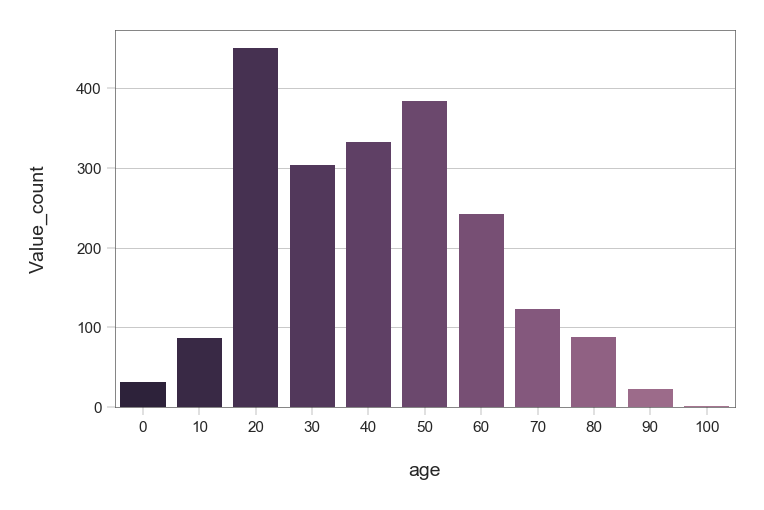

In [60]:
fig, ax = plt.subplots()
sns.barplot( x = 'age', y = 'Value_count', data = age_count, palette = sns.cubehelix_palette(n_colors = 20, reverse = True), ax = ax)

##### Majority of the patients infected are in their 20s

In [61]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

In [62]:
released_patients = df.loc[df['state'] == 'released']

In [63]:
released_patients['released_date'] = pd.to_datetime(released_patients['released_date'])
released_patients['confirmed_date'] = pd.to_datetime(released_patients['confirmed_date'])

released_patients['day_diff'] = released_patients['released_date'] - released_patients['confirmed_date']
released_patients['day_diff'] = released_patients['day_diff']/np.timedelta64(1,'D')

released_patients

C:\Users\ABOLARIN BUKOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ABOLARIN BUKOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ABOLARIN BUKOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,sex,country,province,disease,infection_case,confirmed_date,released_date,deceased_date,state,age_int,day_diff
0,male,Korea,Seoul,False,overseas inflow,2020-01-23,2020-02-05,None,released,50,13.00
1,male,Korea,Seoul,False,overseas inflow,2020-01-30,2020-03-02,None,released,30,32.00
2,male,Korea,Seoul,False,contact with patient,2020-01-30,2020-02-19,None,released,50,20.00
3,male,Korea,Seoul,False,overseas inflow,2020-01-30,2020-02-15,None,released,20,16.00
4,female,Korea,Seoul,False,contact with patient,2020-01-31,2020-02-24,None,released,20,24.00
...,...,...,...,...,...,...,...,...,...,...,...
2031,male,Korea,Gyeongsangnam-do,False,others,2020-03-11,2020-03-14,None,released,40,3.00
2058,male,Korea,Jeju-do,False,others,2020-02-20,2020-03-23,None,released,20,32.00
2059,female,Korea,Jeju-do,False,others,2020-02-22,2020-03-07,None,released,20,14.00
2060,female,Korea,Jeju-do,False,others,2020-03-02,2020-03-15,None,released,40,13.00


In [64]:
released_patients['day_diff'].sum()/ released_patients['day_diff'].count()

19.791984732824428

##### On average day difference for the released is approximately 19 days

In [65]:
released_sex_grouped = released_patients[['sex', 'day_diff']]

sex_grouped = released_sex_grouped.groupby('sex', as_index = False).mean()
sex_grouped

,sex,day_diff
0,female,20.01
1,male,19.53


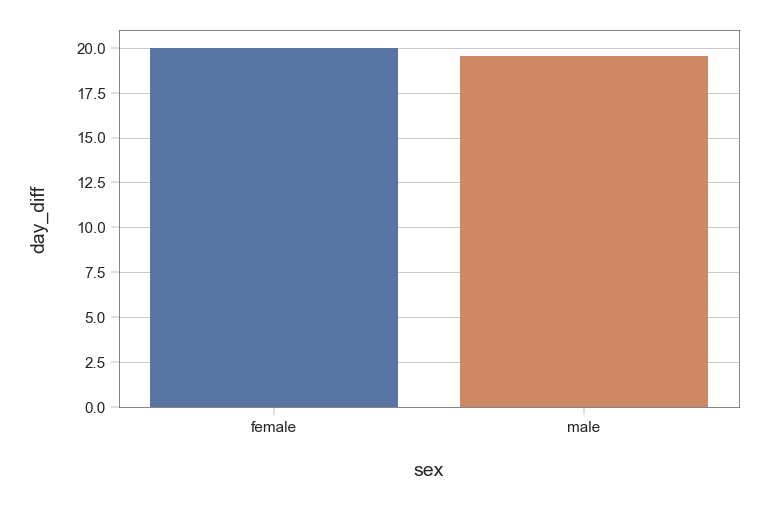

In [66]:
 fig, ax = plt.subplots()
sns.barplot( x = 'sex', y = 'day_diff', data = sex_grouped, ax = ax)

#####  On average the released day difference for both male and female are almost the same

In [103]:
age_count = released_patients['age_int'].value_counts().to_frame().reset_index().rename(columns = {'index': 'age', 'age_int': 'Value_count'})

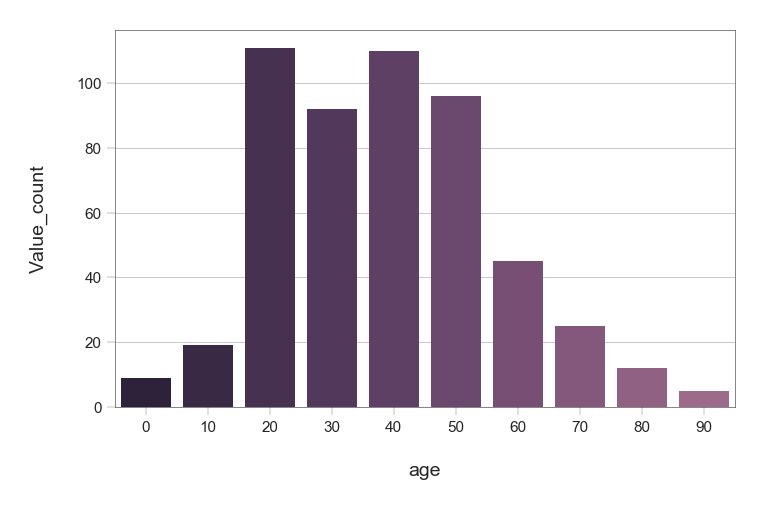

In [68]:
fig, ax = plt.subplots()
sns.barplot( x = 'age', y = 'Value_count', data = age_count, palette = sns.cubehelix_palette(n_colors = 20, reverse = True), ax = ax)

##### Of the patients released most of them are in their 20s and 40s

In [74]:
deceased_patients = df.loc[df['state'] == 'deceased']

In [75]:
deceased_patients['deceased_date'] = pd.to_datetime(deceased_patients['deceased_date'])
deceased_patients['confirmed_date'] = pd.to_datetime(deceased_patients['confirmed_date'])

deceased_patients['day_diff'] = deceased_patients['deceased_date'] - deceased_patients['confirmed_date']
deceased_patients['day_diff'] = deceased_patients['day_diff']/np.timedelta64(1,'D')

deceased_patients

C:\Users\ABOLARIN BUKOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ABOLARIN BUKOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ABOLARIN BUKOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,sex,country,province,disease,infection_case,confirmed_date,released_date,deceased_date,state,age_int,day_diff
524,male,Korea,Daegu,False,Shincheonji Church,2020-02-21,None,2020-02-26,deceased,70,5.00
794,male,Mongolia,Gyeonggi-do,False,others,2020-02-25,None,2020-02-25,deceased,30,0.00
1374,female,Korea,Gangwon-do,True,contact with patient,2020-03-04,None,2020-03-04,deceased,80,0.00
1641,male,Korea,Gyeongsangbuk-do,False,others,2020-03-20,None,2020-04-02,deceased,90,13.00
1645,male,Korea,Gyeongsangbuk-do,False,others,2020-03-20,None,2020-04-03,deceased,70,14.00
1653,female,Korea,Gyeongsangbuk-do,False,others,2020-03-20,None,2020-04-05,deceased,80,16.00
1655,male,Korea,Gyeongsangbuk-do,False,others,2020-03-21,None,2020-03-31,deceased,80,10.00
1661,male,Korea,Gyeongsangbuk-do,False,others,2020-03-26,None,2020-04-06,deceased,70,11.00
1669,female,Korea,Gyeongsangbuk-do,False,others,2020-03-29,None,2020-03-31,deceased,70,2.00
1671,female,Korea,Gyeongsangbuk-do,False,others,2020-03-29,None,2020-04-03,deceased,80,5.00


In [87]:
deceased_patients['day_diff'].sum()/ deceased_patients['day_diff'].count()

5.1

##### On average the day difference for the deceased is 5 days

In [78]:
deceased_sex_grouped = deceased_patients[['sex', 'day_diff']]

sex_grouped = deceased_sex_grouped.groupby('sex', as_index = False).mean()
sex_grouped

,sex,day_diff
0,female,5.50
1,male,4.93


##### On average the day difference for the deceased males and females are quite similar

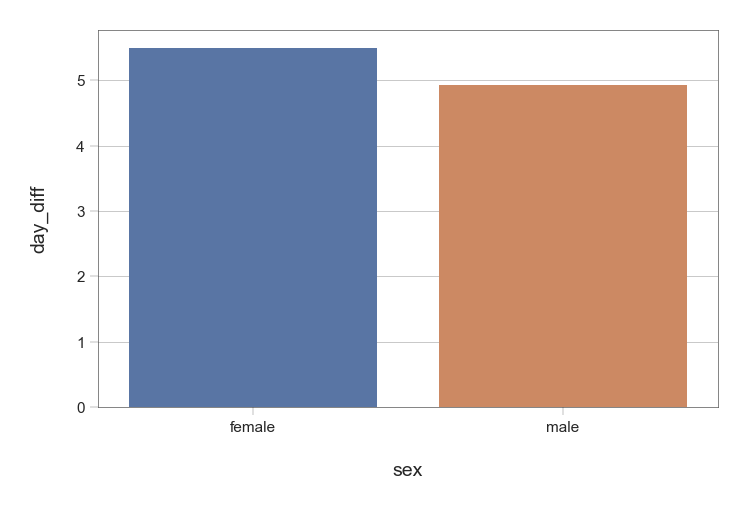

In [79]:
fig, ax = plt.subplots()
sns.barplot( x = 'sex', y = 'day_diff', data = sex_grouped, ax = ax)

In [80]:
age_count = deceased_patients['age_int'].value_counts().to_frame().reset_index().rename(columns = {'index': 'age', 'age_int': 'Value_count'})

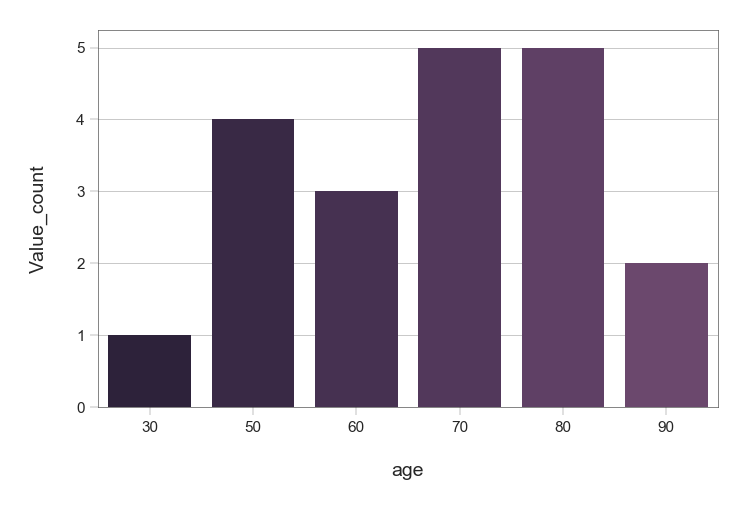

In [81]:
fig, ax = plt.subplots()
sns.barplot( x = 'age', y = 'Value_count', data = age_count, palette = sns.cubehelix_palette(n_colors = 20, reverse = True), ax = ax)

##### majority of the deceased were in their 70s and 80s also notice that  nobody below 30s has died

In [88]:
df.head()

,sex,country,province,disease,infection_case,confirmed_date,released_date,deceased_date,state,age_int
0,male,Korea,Seoul,False,overseas inflow,2020-01-23,2020-02-05,None,released,50
1,male,Korea,Seoul,False,overseas inflow,2020-01-30,2020-03-02,None,released,30
2,male,Korea,Seoul,False,contact with patient,2020-01-30,2020-02-19,None,released,50
3,male,Korea,Seoul,False,overseas inflow,2020-01-30,2020-02-15,None,released,20
4,female,Korea,Seoul,False,contact with patient,2020-01-31,2020-02-24,None,released,20


In [89]:
df['month'] = pd.DatetimeIndex(df['confirmed_date']).month

In [96]:
df['month'].replace([1,2,3,4], ['January','February', 'March', 'April'] , inplace = True)

In [99]:
df1 = df['month'].value_counts().to_frame().reset_index().rename(columns = {'index': 'month', 'month': 'Value_count'})

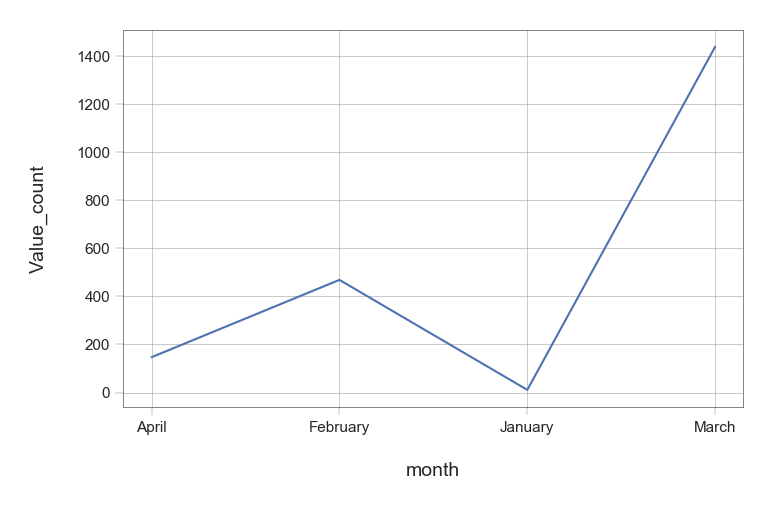

In [100]:
fig, ax = plt.subplots()
sns.lineplot( x = 'month', y = 'Value_count', data = df1)

##### An increase as the year progresses

## CONCLUSION
##### -- Majority of the patients infection case was by contact with infected patient
##### -- Released patients on average have day difference of 19 days approximately
##### --Deceased patients on average have a day difference 0f 5 days approximately
##### --According to the dataset nobody below their 30s are in a deceased state
##### --Their has been a steady increase in infected patients
##### --Majority of the patients are in their 20s
##### --Of the people released most are in their 20s and 40s
##### --of the people deceased most were in their  70s and 80s
##### --Gender seems to have NO effect on patients infected, deceased day difference and released day difference